# Breast Cancer Classification 

In [1]:
# importing dependancies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# reading in breast cancer data
breast_data = pd.read_csv('data.csv')
breast_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
breast_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
breast_data.shape

(569, 33)

In [6]:
breast_data = breast_data.drop(['Unnamed: 32'],axis=1)
breast_data = breast_data.drop(['id'], axis=1)
breast_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
breast_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
breast_data.iloc[0].values

array(['M', 17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471,
       0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904,
       0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0,
       0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189], dtype=object)

 Above we can see that less than half of our patients have *M (malignant tumors)*, while the major of those tumors are *B (benign tumors)*

In [9]:
breast_data.head(50)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

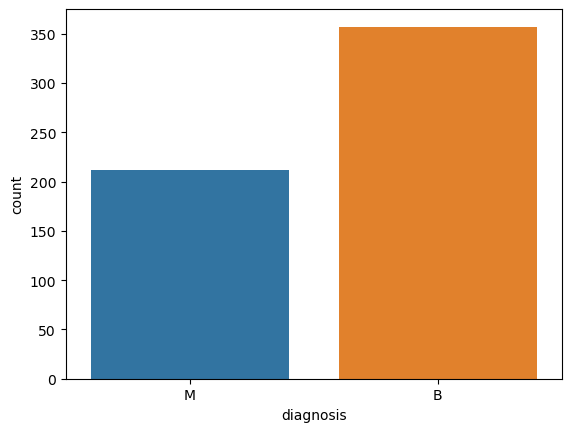

In [10]:
sns.countplot(breast_data['diagnosis'])

In [12]:
# Here we can begin our machine learning model by import sklrean.
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
breast_data.iloc[:,0] = labelencoder_Y.fit_transform(breast_data.iloc[:,0].values)
breast_data.head(50)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


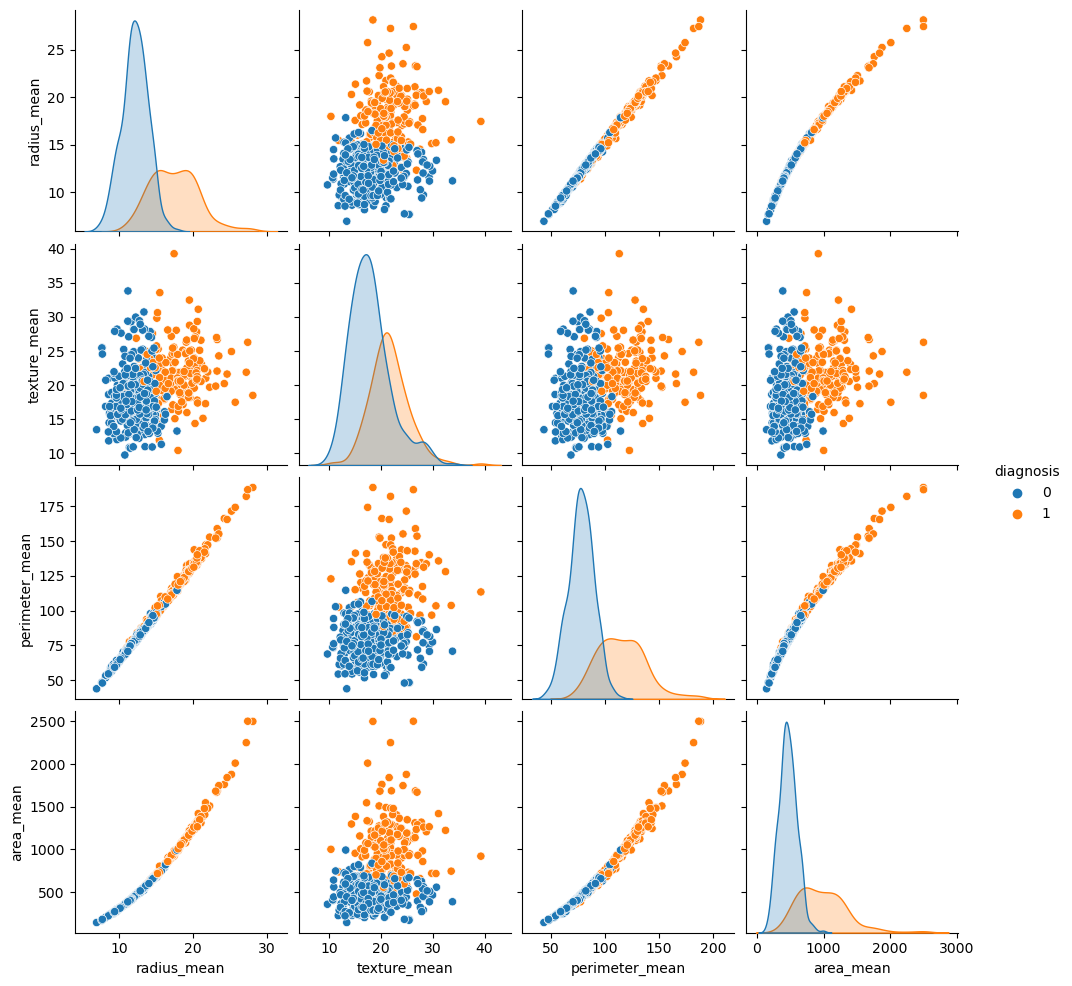

In [13]:


sns.pairplot(breast_data.iloc[:,0:5], hue = 'diagnosis')

Above we can see that our M - (malignant tumor - 1) has a much smaller mean radius, texture, and perimeter.
While our B - (benign tumor - 0) has a much larger mean radius, texture, and perimeter. 
We can then assume that the size and compactness of the M tumor is more deadly due to the cell composition of compaction to cause a much more effective disease.

In [14]:
# lets take a look at the correlation between each column
breast_data.iloc[:,0:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

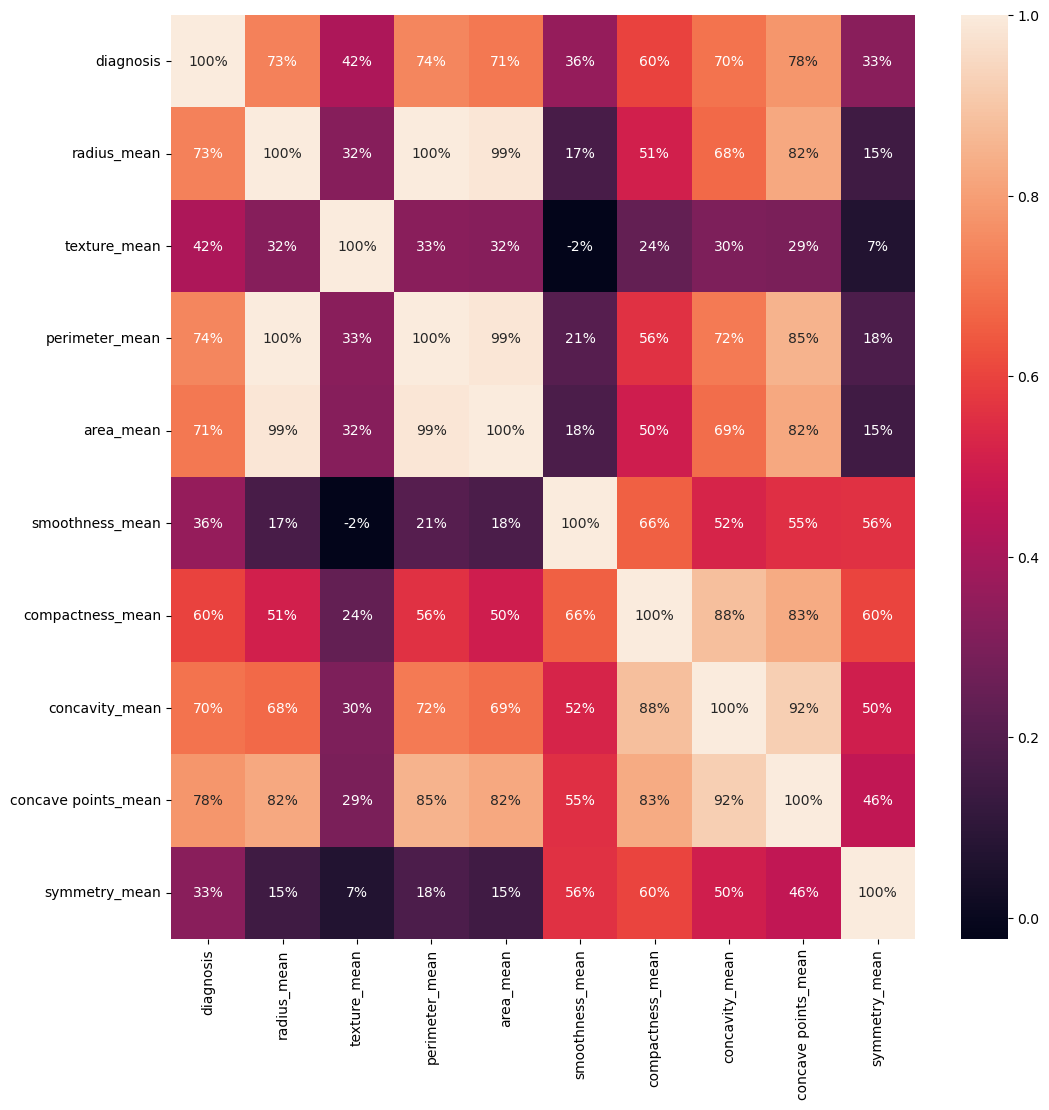

In [15]:
# lets visualize our correlations
plt.figure(figsize=(12,12))
sns.heatmap(breast_data.iloc[:,0:10].corr(), annot=True, fmt='.0%')

 Above the heat map shows the correlation between a few points that can be the driving force for predictions Malignant Tumors and finding the right diagnosis at the right time.
The perimeter_mean and the radius_mean has a 100% correlation, the perimeter_mean and area_mean has 99% correlation, the compactness_mean and the concavity_mean has a 88% correlation. 
This is a great finding, hopefully in the future we can use this data to improve our early tumor diagnosis whether it be benign or malignant. 

In [16]:
Y = breast_data.pop('diagnosis')
X = breast_data

In [18]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [19]:
#lets begin our train and testing by split them into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [20]:
X_test.iloc[0].values

array([1.340e+01, 2.052e+01, 8.864e+01, 5.567e+02, 1.106e-01, 1.469e-01,
       1.445e-01, 8.172e-02, 2.116e-01, 7.325e-02, 3.906e-01, 9.306e-01,
       3.093e+00, 3.367e+01, 5.414e-03, 2.265e-02, 3.452e-02, 1.334e-02,
       1.705e-02, 4.005e-03, 1.641e+01, 2.966e+01, 1.133e+02, 8.444e+02,
       1.574e-01, 3.856e-01, 5.106e-01, 2.051e-01, 3.585e-01, 1.109e-01])

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
# Here lets try to run a few different models on our datasets
def models(X_train, Y_train):
    #Logistic Regression Model
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    
    #Next is the Decision Tree Classifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
    tree.fit(X_train, Y_train)
    
    #Next RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state = 0, criterion = 'entropy', n_estimators = 12)
    forest.fit(X_train, Y_train)
    pickle.dump(forest, open('breast_cancer_classificationRForst99.pkl', 'wb'))
    
    print('[0]logistic regression accuracy:', log.score(X_train, Y_train))
    print('[0]decision tree accuracy:', tree.score(X_train, Y_train))
    print('[0]random forest accuracy:', forest.score(X_train, Y_train))
    
    return log, tree, forest

In [29]:
import pickle
model = models(X_train, Y_train)

[0]logistic regression accuracy: 0.989010989010989
[0]decision tree accuracy: 1.0
[0]random forest accuracy: 0.9978021978021978


In [30]:
import pickle
pickle.dump(model[2], open('breast_cancer_classification_randomForest_99.pkl', 'wb'))

Model 0
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

Accuracy Score:  0.9473684210526315
Model 1
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Accuracy Score:  0.9298245614035088
Model 2
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.9

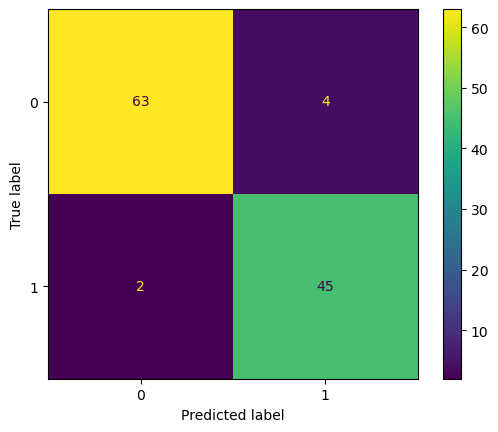

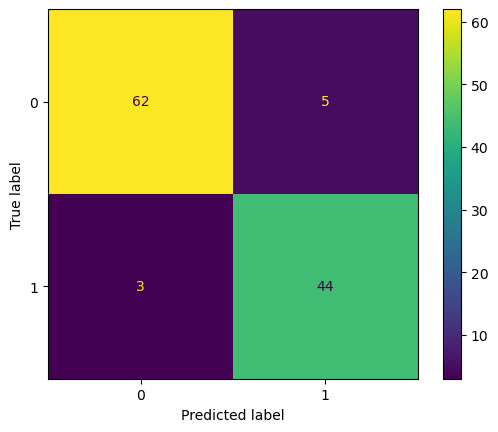

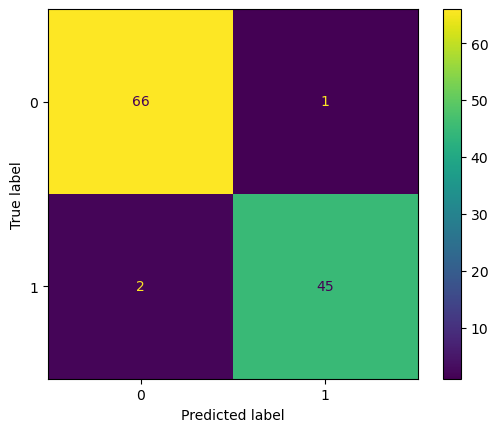

In [23]:
# Now we can go ahead and test the models and inspect the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
for i in range(len(model)):
    print('Model', i)
    print(classification_report(Y_test, model[i].predict(X_test)))
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    print('Accuracy Score: ', accuracy_score(Y_test, model[i].predict(X_test)))
